In [1]:
import import_ipynb
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [3]:
IMAGE_SIZE = 256
BATCH_SIZE = 16
CHANNELS = 3
EPOCHS = 20
#Constant to use anywhwere

In [4]:
 dataset =  tf.keras.preprocessing.image_dataset_from_directory(
    "Dataset_2",
     shuffle=True,
    image_size = (IMAGE_SIZE,IMAGE_SIZE),
    batch_size = BATCH_SIZE  
)

Found 150 files belonging to 3 classes.


In [5]:
 class_names = dataset.class_names
 class_names
#loaded the dataset  

['Healthy', 'Powdery', 'Rust']

In [8]:
def dataset_partition(ds, train_split=0.7, val_split=0.15, test_split=0.15, shuffle=True, shuffle_size=10000):
    ds_size = len(ds)
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=5)
        
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    train_ds = ds.take(train_size)
    val_ds= ds.skip(train_size).take(val_size)
    test_ds= ds.skip(train_size).skip(val_size)

    return train_ds, val_ds, test_ds

In [9]:
train_ds, val_ds, test_ds = dataset_partition(dataset)
#split the dataset

In [10]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [11]:
resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [12]:
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2)
])

In [13]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 5 

model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32, (3,3), activation='relu', input_shape = input_shape),
    layers.MaxPooling2D((2,2)), 
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(32, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
    
])
model.build(input_shape=input_shape)
#define architecture

In [14]:
model.compile(
 	optimizer='adam',
 	loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
 	metrics=['accuracy']
)

In [15]:
history = model.fit(
	train_ds,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data=val_ds
)

Epoch 1/20
7/7 [==============================] - 109s 5s/step - loss: 1.4519 - accuracy: 0.2679 - val_loss: 1.1739 - val_accuracy: 0.2500
Epoch 2/20
7/7 [==============================] - 18s 3s/step - loss: 1.1322 - accuracy: 0.4107 - val_loss: 1.2381 - val_accuracy: 0.3750
Epoch 3/20
7/7 [==============================] - 24s 3s/step - loss: 1.0585 - accuracy: 0.5179 - val_loss: 0.9638 - val_accuracy: 0.5000
Epoch 4/20
7/7 [==============================] - 14s 2s/step - loss: 0.9839 - accuracy: 0.4018 - val_loss: 0.9447 - val_accuracy: 0.4375
Epoch 5/20
7/7 [==============================] - 14s 2s/step - loss: 0.9478 - accuracy: 0.5536 - val_loss: 1.0123 - val_accuracy: 0.5625
Epoch 6/20
7/7 [==============================] - 18s 3s/step - loss: 0.9610 - accuracy: 0.5446 - val_loss: 0.9323 - val_accuracy: 0.6250
Epoch 7/20
7/7 [==============================] - 21s 3s/step - loss: 0.8617 - accuracy: 0.6250 - val_loss: 0.9236 - val_accuracy: 0.5000
Epoch 8/20
7/7 [=================

In [16]:
model.evaluate(test_ds)

2/2 [==============================] - 9s 553ms/step - loss: 0.5627 - accuracy: 0.8125


[0.5626684427261353, 0.8125]

In [17]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

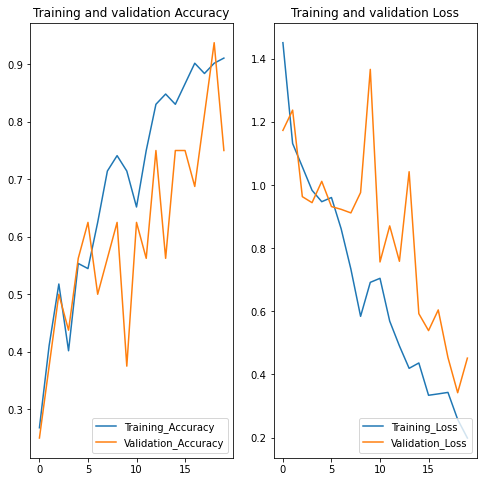

In [18]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training_Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation_Accuracy')
plt.legend(loc='lower right')
plt.title('Training and validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training_Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation_Loss')
plt.legend(loc='lower right')
plt.title('Training and validation Loss')
plt.show()

first img to predict
Actual label: Powdery
1/1 [==============================] - 2s 2s/step
Predicted label: Powdery


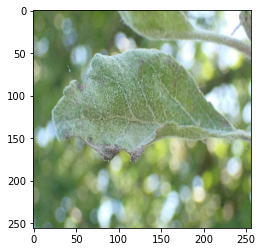

In [19]:
import numpy as np
for image_batch, label_batch in dataset.take(1):
        first_img = image_batch[0].numpy().astype('uint8')
        first_label = label_batch[0].numpy()
        
        print("first img to predict")
        plt.imshow(first_img)
        print("Actual label:", class_names[first_label])
        
        batch_prediction = model.predict(image_batch)
        print("Predicted label:",class_names[np.argmax(batch_prediction[0])])

In [20]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 202ms/step


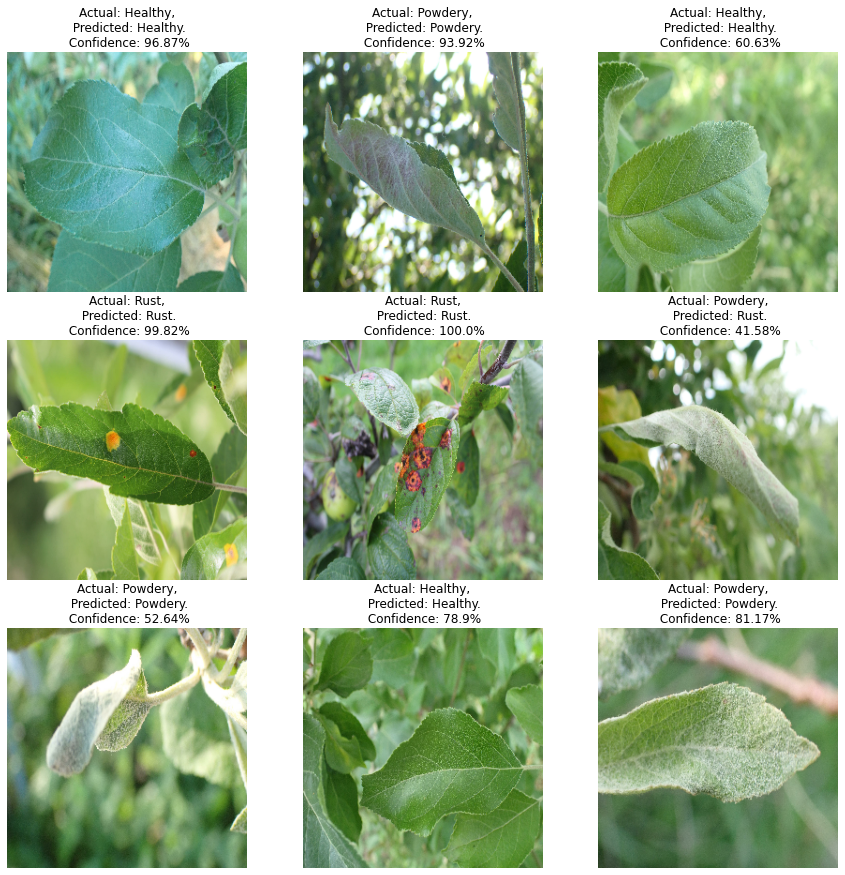

In [21]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")

In [22]:
import os
model_version=max([int(i) for i in os.listdir("./Models") + [0]])+1
model.save(f"./Models/{model_version}")

INFO:tensorflow:Assets written to: ./Models/3\assets


INFO:tensorflow:Assets written to: ./Models/3\assets


In [23]:
model.save("./RiceCNN.h5")